In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn import metrics
import os


In [24]:
filename='top50.csv'
df=pd.read_csv(filename,encoding='ISO-8859-1', index_col=0)
df

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
1,Señorita,Shawn Mendes,canadian pop,117.0,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105.0,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190.0,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,NaN,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150.0,65,58,-4,11,18,175,45,7,94
6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102.0,68,80,-5,9,84,220,9,4,84
7,Ransom,Lil Tecca,trap music,180.0,64,75,-6,7,23,131,2,29,92
8,How Do You Sleep?,Sam Smith,pop,111.0,68,48,-5,8,35,202,15,9,90
9,Old Town Road - Remix,Lil Nas X,country rap,136.0,62,88,-6,11,64,157,5,10,87
10,bad guy,Billie Eilish,electropop,135.0,43,70,-11,10,56,194,33,38,95


In [25]:
#Calculates the number of rows and columns
print(df.shape)

(50, 13)


In [26]:
#Renaming the columns
df.rename(columns={'Track.Name':'track_name','Artist.Name':'artist_name','Beats.Per.Minute':'beats_per_minute','Loudness..dB..':'Loudness(dB)','Valence.':'Valence','Length.':'Length', 'Acousticness..':'Acousticness','Speechiness.':'Speechiness'},inplace=True)
df.head()

,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
1,Señorita,Shawn Mendes,canadian pop,117.0,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105.0,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190.0,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,NaN,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150.0,65,58,-4,11,18,175,45,7,94


In [27]:
df.isnull().sum()

track_name          0
artist_name         0
Genre               0
beats_per_minute    1
Energy              0
Danceability        0
Loudness(dB)        0
Liveness            0
Valence             0
Length              0
Acousticness        0
Speechiness         0
Popularity          0
dtype: int64

In [28]:
# df.fillna(0)
df.fillna(df.mean(), inplace=True)

In [29]:
df.head()

,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
1,Señorita,Shawn Mendes,canadian pop,117.000000,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105.000000,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190.000000,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,120.612245,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150.000000,65,58,-4,11,18,175,45,7,94


In [30]:
# The datatypes of the different attributes of the dataset
print(df.dtypes)

track_name           object
artist_name          object
Genre                object
beats_per_minute    float64
Energy                int64
Danceability          int64
Loudness(dB)          int64
Liveness              int64
Valence               int64
Length                int64
Acousticness          int64
Speechiness           int64
Popularity            int64
dtype: object


In [31]:
#Calculating the number of songs of each genre
print(type(df['Genre']))
popular_genre=df.groupby('Genre').size()
print(popular_genre)
genre_list=df['Genre'].values.tolist()

<class 'pandas.core.series.Series'>
Genre
atl hip hop         1
australian pop      1
big room            1
boy band            1
brostep             2
canadian hip hop    3
canadian pop        2
country rap         2
dance pop           8
dfw rap             2
edm                 3
electropop          2
escape room         1
latin               5
panamanian pop      2
pop                 7
pop house           1
r&b en espanol      1
reggaeton           2
reggaeton flow      2
trap music          1
dtype: int64


In [32]:
#Calculating the number of songs by each of the artists
print(df.groupby('artist_name').size())

artist_name
Ali Gatie           1
Anuel AA            1
Ariana Grande       2
Bad Bunny           1
Billie Eilish       2
Chris Brown         1
DJ Snake            1
Daddy Yankee        1
Drake               1
Ed Sheeran          4
J Balvin            2
Jhay Cortez         1
Jonas Brothers      1
Katy Perry          1
Khalid              1
Kygo                1
Lady Gaga           1
Lauv                1
Lewis Capaldi       1
Lil Nas X           2
Lil Tecca           1
Lizzo               1
Lunay               1
MEDUZA              1
Maluma              1
Marshmello          2
Martin Garrix       1
Nicky Jam           1
Post Malone         2
ROSALÍA             1
Sam Smith           1
Sech                2
Shawn Mendes        2
Taylor Swift        1
The Chainsmokers    2
Tones and I         1
Y2K                 1
Young Thug          1
dtype: int64


In [33]:
popular_artist=df.groupby('artist_name').size()
print(popular_artist)
artist_list=df['artist_name'].values.tolist()

artist_name
Ali Gatie           1
Anuel AA            1
Ariana Grande       2
Bad Bunny           1
Billie Eilish       2
Chris Brown         1
DJ Snake            1
Daddy Yankee        1
Drake               1
Ed Sheeran          4
J Balvin            2
Jhay Cortez         1
Jonas Brothers      1
Katy Perry          1
Khalid              1
Kygo                1
Lady Gaga           1
Lauv                1
Lewis Capaldi       1
Lil Nas X           2
Lil Tecca           1
Lizzo               1
Lunay               1
MEDUZA              1
Maluma              1
Marshmello          2
Martin Garrix       1
Nicky Jam           1
Post Malone         2
ROSALÍA             1
Sam Smith           1
Sech                2
Shawn Mendes        2
Taylor Swift        1
The Chainsmokers    2
Tones and I         1
Y2K                 1
Young Thug          1
dtype: int64


In [34]:
df.head()

,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
1,Señorita,Shawn Mendes,canadian pop,117.000000,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105.000000,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190.000000,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,120.612245,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150.000000,65,58,-4,11,18,175,45,7,94


In [35]:
df.isnull().sum()

track_name          0
artist_name         0
Genre               0
beats_per_minute    0
Energy              0
Danceability        0
Loudness(dB)        0
Liveness            0
Valence             0
Length              0
Acousticness        0
Speechiness         0
Popularity          0
dtype: int64

In [36]:
df.describe()

,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.612245,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,30.650643,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,107.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [37]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
columns = list(newdf.columns)

In [38]:
columns

['beats_per_minute',
 'Energy',
 'Danceability',
 'Loudness(dB)',
 'Liveness',
 'Valence',
 'Length',
 'Acousticness',
 'Speechiness',
 'Popularity']

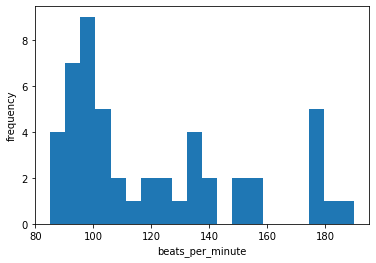

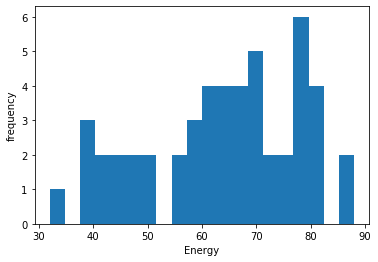

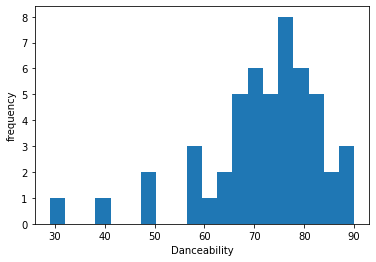

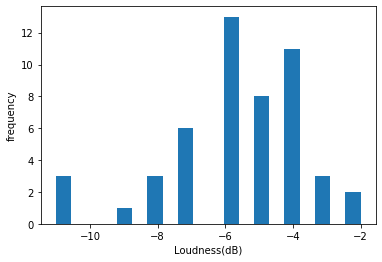

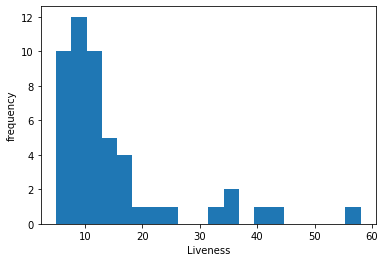

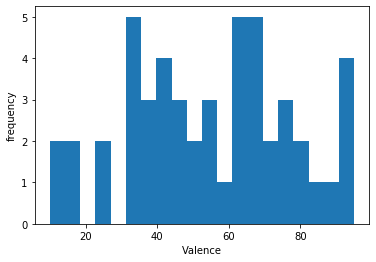

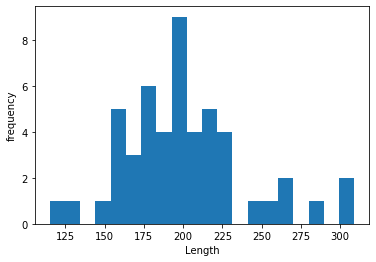

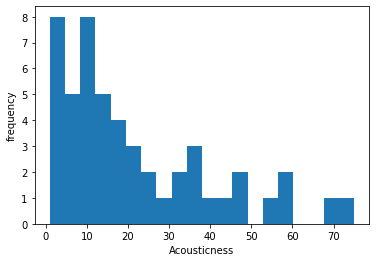

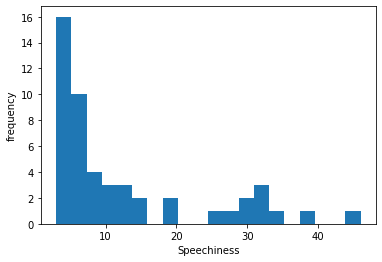

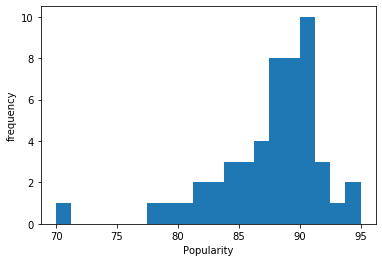

In [39]:

# Plotting a histogram to show the difference 
for col in columns:
    plt.ylabel('frequency')
    plt.xlabel(col)
    plt.hist(newdf[col], bins=20)
    plt.show()


In [40]:
correlation=df.corr()
print(correlation)

                  beats_per_minute    Energy  Danceability  Loudness(dB)  \
beats_per_minute          1.000000  0.045324     -0.106317     -0.003766   
Energy                    0.045324  1.000000      0.018254      0.670794   
Danceability             -0.106317  0.018254      1.000000      0.016255   
Loudness(dB)             -0.003766  0.670794      0.016255      1.000000   
Liveness                 -0.179651  0.162768     -0.149636      0.258652   
Valence                  -0.011350  0.438820      0.172829      0.237614   
Length                   -0.141805  0.224677     -0.000185      0.219219   
Acousticness             -0.041537 -0.339892     -0.098165     -0.138300   
Speechiness               0.572294 -0.089860     -0.103472     -0.272213   
Popularity                0.191542 -0.080295     -0.071413     -0.043085   

                  Liveness   Valence    Length  Acousticness  Speechiness  \
beats_per_minute -0.179651 -0.011350 -0.141805     -0.041537     0.572294   
Energy   

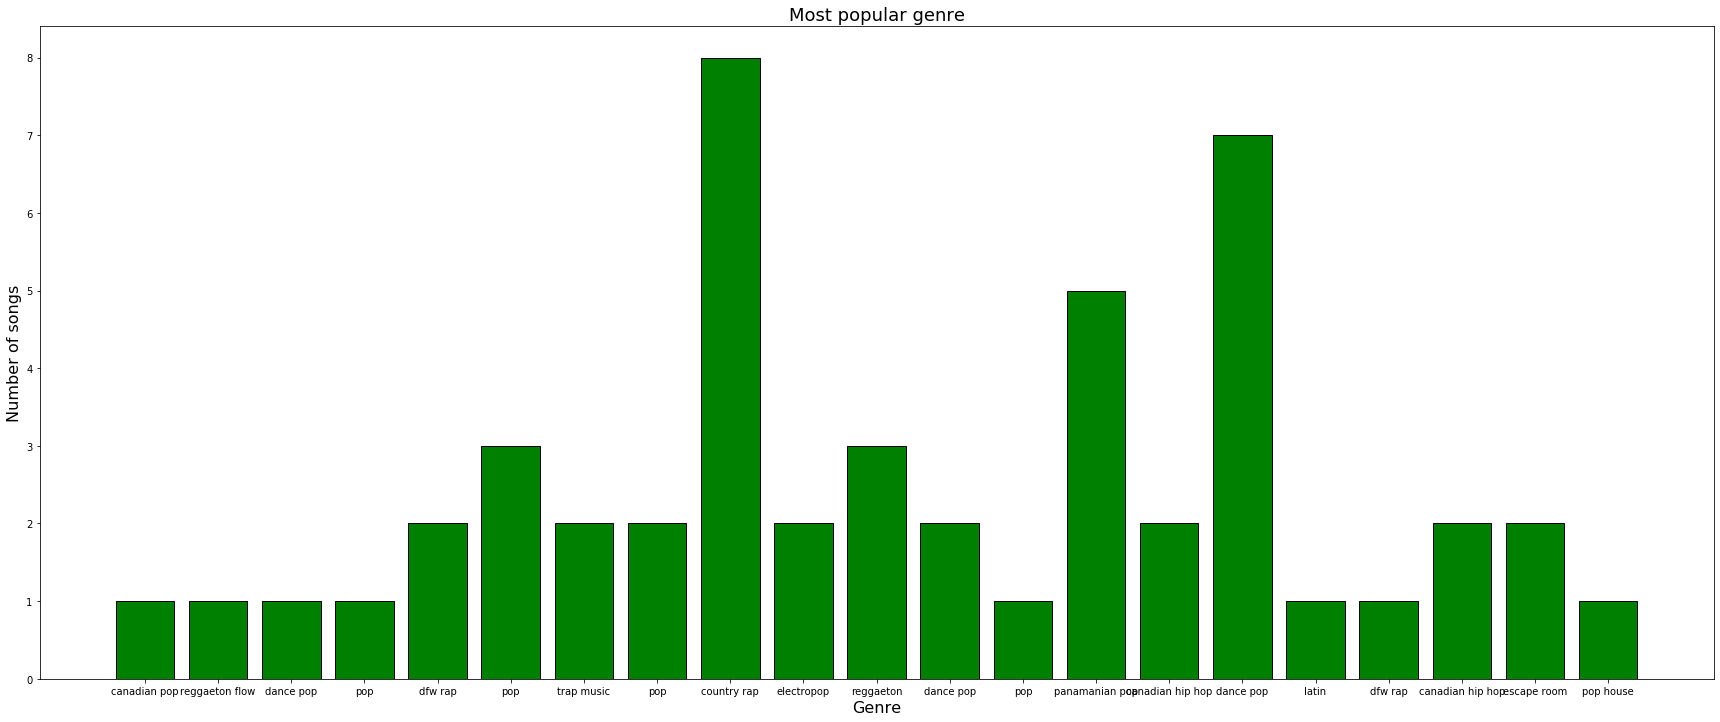

In [41]:
# Bar graph to see the number of songs of each genre
fig, ax=plt.subplots(figsize=(30,12))
length=np.arange(len(popular_genre))
plt.bar(length,popular_genre,color='green',edgecolor='black')
plt.xticks(length,genre_list)
plt.title('Most popular genre',fontsize=18)
plt.xlabel('Genre',fontsize=16)
plt.ylabel('Number of songs',fontsize=16)
plt.show()

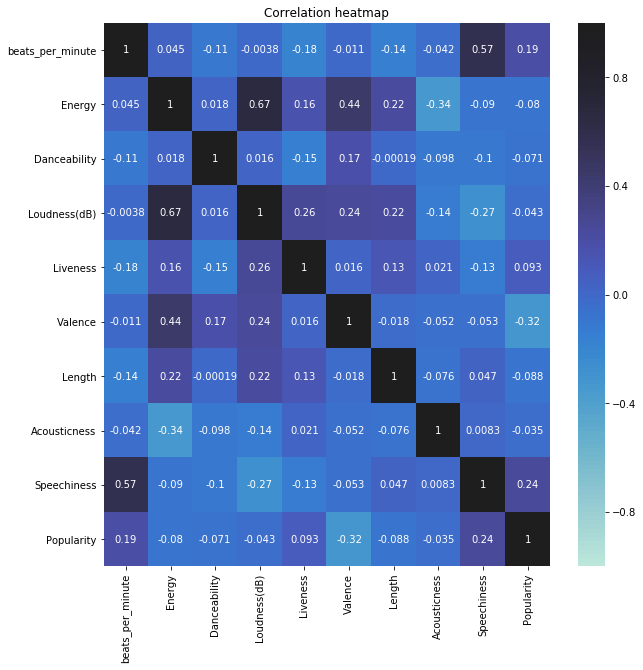

In [42]:
# heatmap of the correlation 
plt.figure(figsize=(10,10))
plt.title('Correlation heatmap')
sns.heatmap(correlation,annot=True,vmin=-1,vmax=1,center=1)

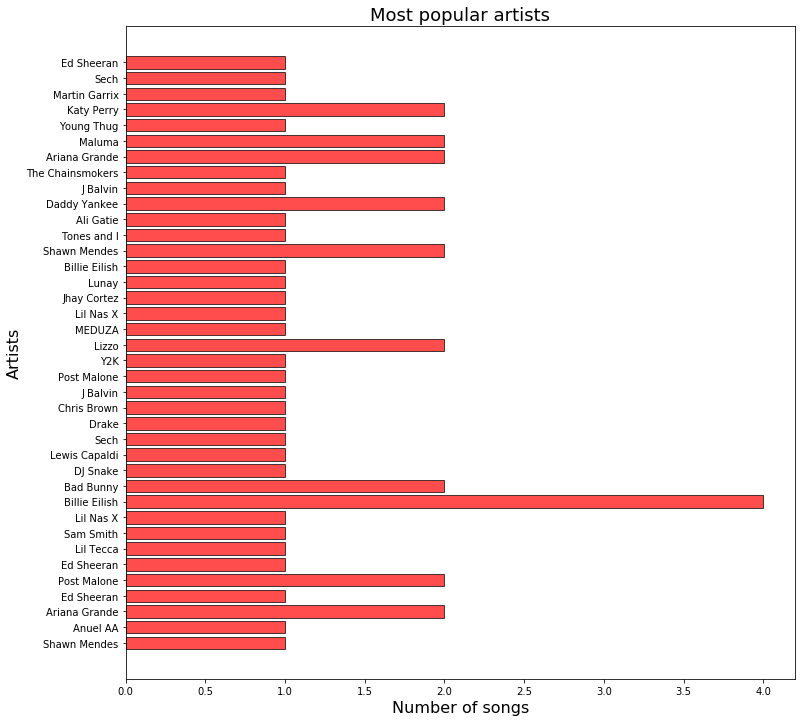

In [43]:
fig, ax=plt.subplots(figsize=(12,12))
length=np.arange(len(popular_artist))
plt.barh(length,popular_artist,color='red',edgecolor='black',alpha=0.7)
plt.yticks(length,artist_list)
plt.title('Most popular artists',fontsize=18)
plt.ylabel('Artists',fontsize=16)
plt.xlabel('Number of songs',fontsize=16)
plt.show()

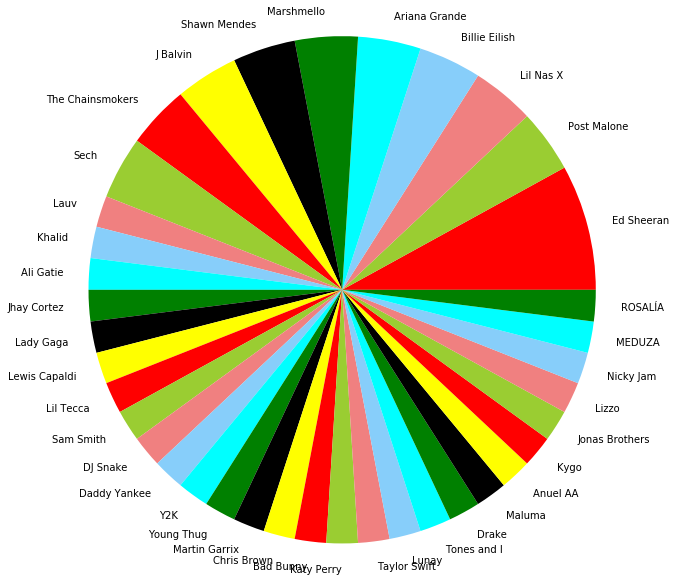

In [44]:
#Pie charts 
labels = df.artist_name.value_counts().index
sizes = df.artist_name.value_counts().values
colors = ['red', 'yellowgreen', 'lightcoral', 'lightskyblue','cyan', 'green', 'black','yellow']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, colors=colors)
autopct=('%1.1f%%')
plt.axis('equal')
plt.show()

In [45]:
#Linear regression, first create test and train dataset
x=df.loc[:,['Energy','Danceability','Length','Loudness(dB)','Acousticness']].values
y=df.loc[:,'Popularity'].values

In [46]:
# Creating a test and training dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [47]:
# Linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# print(regressor.intercept_)
# print(regressor.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
#Displaying the difference between the actual and the predicted
y_pred = regressor.predict(X_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

    Actual  Predicted
0       88  87.332015
1       88  89.349812
2       92  83.427359
3       84  92.487865
4       89  86.926272
5       87  90.006496
6       90  87.947427
7       88  85.950202
8       79  88.786790
9       93  85.526518
10      91  86.186242
11      91  88.669926
12      89  87.866259
13      91  85.622322
14      83  83.016025


In [49]:
#Checking the accuracy of Linear Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.946163060050855
Mean Squared Error: 25.333137659089285
Root Mean Squared Error: 5.033203518544554
